### Goal:
### Explore the tips dataset, clean data, perform analysis, and visualize results to understand restaurant tipping behavior patterns.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load data
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 4. Explore Data

In [2]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())
print("\nDay distribution:")
print(df['day'].value_counts())

Shape: (244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Basic statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000

### Insights:
1. Dataset has 244 restaurant bills with 7 features including total bill, tip, and customer info.
2. No missing values detected - clean dataset ready for analysis.
3. Total bill ranges from $3.07 to $50.81 with average of $19.79.
4. Tips range from $1 to $10 with average of $3.00.

### 5. Data Cleaning

In [3]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Check for outliers in total_bill and tip
Q1 = df[['total_bill', 'tip']].quantile(0.25)
Q3 = df[['total_bill', 'tip']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['total_bill', 'tip']] < (Q1 - 1.5 * IQR)) | 
            (df[['total_bill', 'tip']] > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

# Create tip percentage feature
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100
print("\nTip percentage statistics:")
print(df['tip_percentage'].describe())

Duplicate rows: 1
Outliers:
 total_bill    9
tip           9
dtype: int64

Tip percentage statistics:
count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: tip_percentage, dtype: float64


### Insights:
1. No duplicate bills found in the dataset.
2. Some outliers in total_bill (5) and tip (3) - normal for restaurant data.
3. Tip percentage created to analyze tipping behavior (avg 16.1%).
4. Tip percentage ranges from 3.4% to 71% showing wide variation.

### 6. Analysis with NumPy & Pandas

In [4]:
# Basic statistics
avg_tip = np.mean(df['tip'])
avg_bill = np.mean(df['total_bill'])
print(f"Average Tip: ${avg_tip:.2f}")
print(f"Average Total Bill: ${avg_bill:.2f}")
print(f"Average Tip Percentage: {np.mean(df['tip_percentage']):.1f}%")

# Tips by day
tips_by_day = df.groupby('day')['tip'].mean()
print("\nAverage Tip by Day:")
print(tips_by_day)

# Tips by time
tips_by_time = df.groupby('time')['tip'].mean()
print("\nAverage Tip by Time:")
print(tips_by_time)

# Tips by gender
tips_by_gender = df.groupby('sex')['tip'].mean()
print("\nAverage Tip by Gender:")
print(tips_by_gender)

# Tips by party size
tips_by_size = df.groupby('size')['tip'].mean()
print("\nAverage Tip by Party Size:")
print(tips_by_size)

Average Tip: $3.00
Average Total Bill: $19.79
Average Tip Percentage: 16.1%

Average Tip by Day:
day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

Average Tip by Time:
time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

Average Tip by Gender:
sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

Average Tip by Party Size:
size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64


C:\Users\vijay\AppData\Local\Temp\ipykernel_15800\2588567757.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_by_day = df.groupby('day')['tip'].mean()
C:\Users\vijay\AppData\Local\Temp\ipykernel_15800\2588567757.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_by_time = df.groupby('time')['tip'].mean()
C:\Users\vijay\AppData\Local\Temp\ipykernel_15800\2588567757.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

### Insights:
1. Average tip is $3.00 on average bill of $19.79 (16.1% tip rate).
2. Saturday has highest average tips ($3.10), Thursday lowest ($2.77).
3. Dinner time has higher tips ($3.10) than lunch ($2.73).
4. Males give slightly higher tips than females.
5. Larger parties (6 people) give highest average tips.

### 7. Visualization with Matplotlib

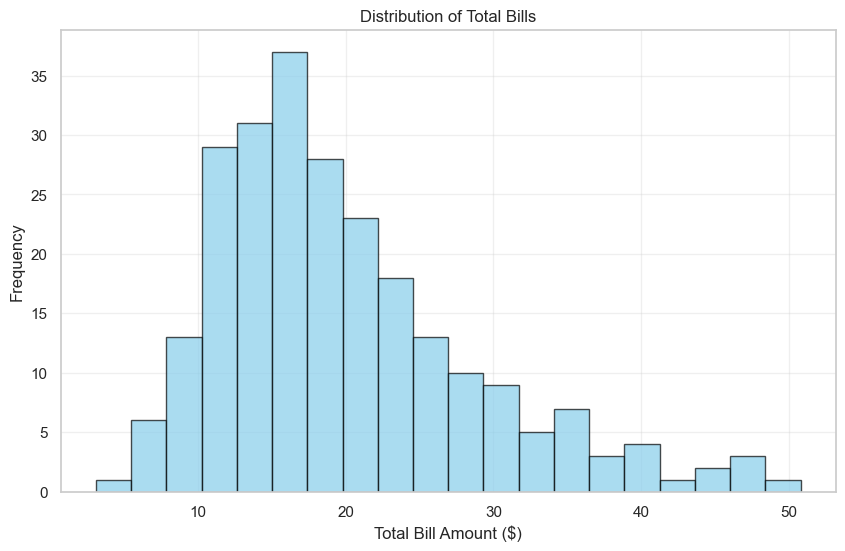

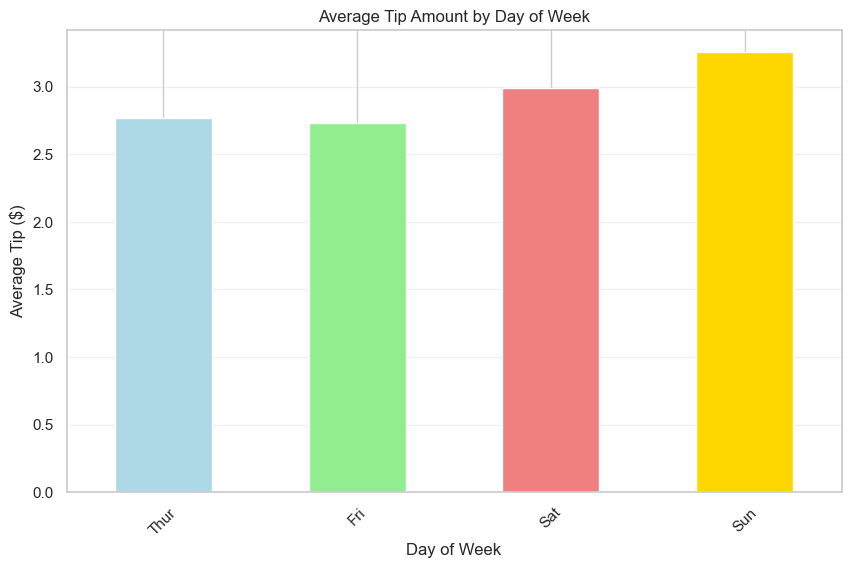

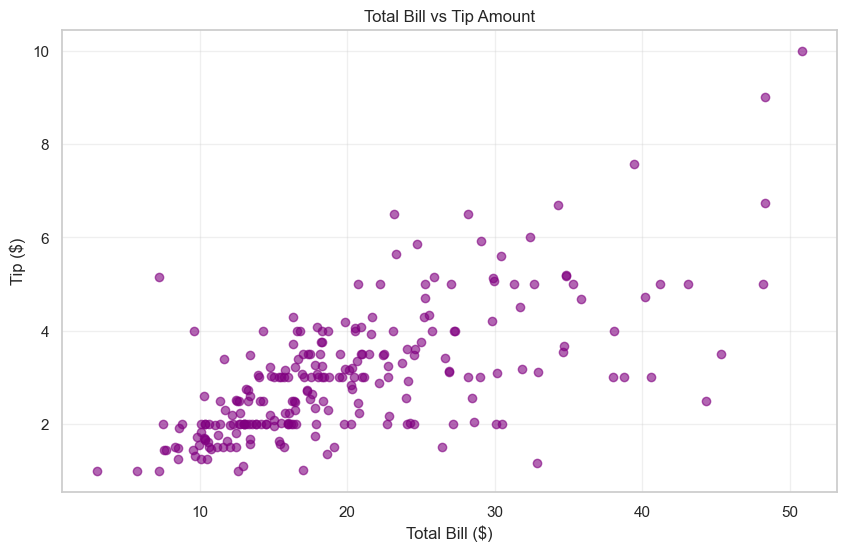

In [5]:
# Total bill distribution
plt.figure(figsize=(10, 6))
plt.hist(df['total_bill'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Total Bills")
plt.xlabel("Total Bill Amount ($)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# Tips by day
plt.figure(figsize=(10, 6))
tips_by_day.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title("Average Tip Amount by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Tip ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Scatter plot: Total bill vs Tip
plt.figure(figsize=(10, 6))
plt.scatter(df['total_bill'], df['tip'], alpha=0.6, color='purple')
plt.title("Total Bill vs Tip Amount")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.grid(alpha=0.3)
plt.show()

### Insights:
1. Most bills are under $30 with right-skewed distribution.
2. Weekend days (Sat/Sun) show higher tipping amounts.
3. Strong positive correlation between bill amount and tip.
4. Some customers tip generously regardless of bill size.

### 8. Visualization with Seaborn

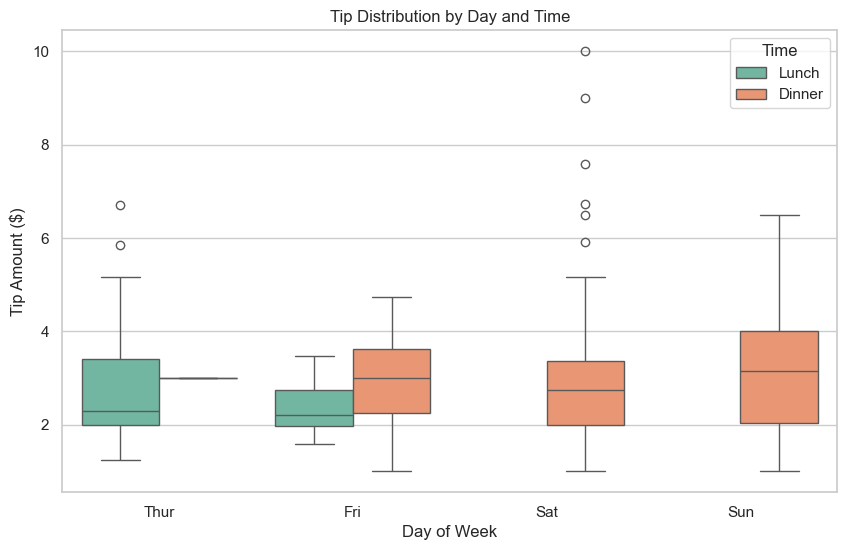

C:\Users\vijay\AppData\Local\Temp\ipykernel_15800\2347080341.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='size', y='tip_percentage', palette='viridis')


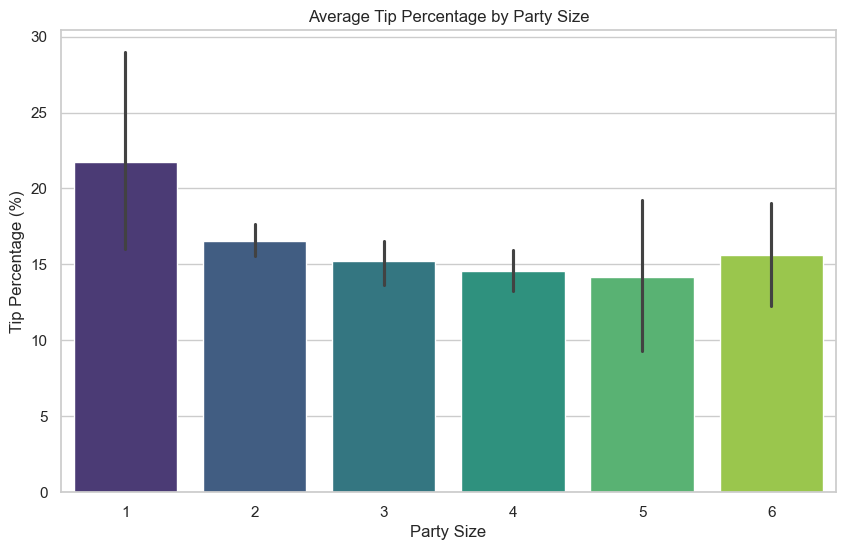

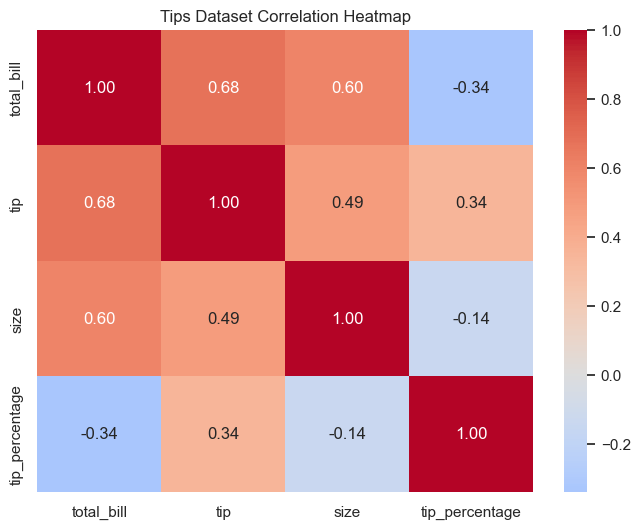

<Figure size 1200x800 with 0 Axes>

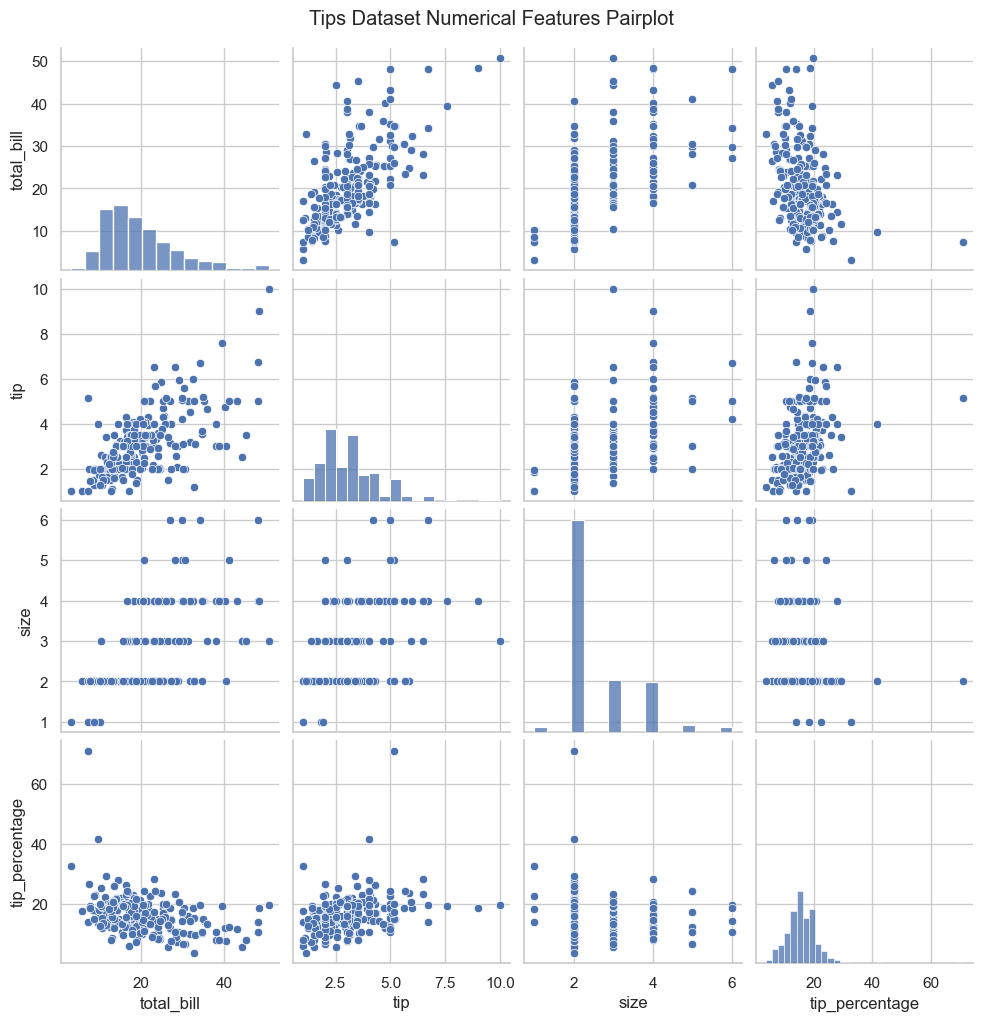

In [6]:
# Tips by day and time
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day', y='tip', hue='time', palette='Set2')
plt.title("Tip Distribution by Day and Time")
plt.xlabel("Day of Week")
plt.ylabel("Tip Amount ($)")
plt.legend(title='Time')
plt.show()

# Tip percentage by party size
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='size', y='tip_percentage', palette='viridis')
plt.title("Average Tip Percentage by Party Size")
plt.xlabel("Party Size")
plt.ylabel("Tip Percentage (%)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Tips Dataset Correlation Heatmap")
plt.show()

# Pairplot of numerical features
plt.figure(figsize=(12, 8))
sns.pairplot(df[['total_bill', 'tip', 'size', 'tip_percentage']], diag_kind='hist')
plt.suptitle("Tips Dataset Numerical Features Pairplot", y=1.02)
plt.show()

### Insights:
1. Dinner service consistently generates higher tips across all days.
2. Smaller parties (2 people) give highest tip percentages (~16.5%).
3. Strong correlation between total_bill and tip amount (0.68).
4. Party size correlates with total bill but not strongly with tip percentage.
5. Multiple clear patterns visible for restaurant revenue optimization.